## **LSTM for Time Series Prediction for Google Stock Data**

Github Link : https://github.com/jyanimaulik/Deep-Learning/tree/main/Homework%208

This Dataset contains 1258 records of google Stock data from 1/3/2012 to 12/30/2016. It has 6 features named Date, Open, High, Low, Close, Volume

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

##Step 1. Import the data from the given .csv file

In [21]:
# Load csv file
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
# Shape of dataframe (number of rows = 1258 and columns = 6)
df.shape

(1258, 6)

In [4]:
# Show first 5 records
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# Show last five records
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [6]:
# Length of the dataframe (number of records)
len(df)

1258

##Step 2. Preprocess the data as you see fit

In [7]:
# Dataset Information from the data stored in the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


As we can see that in this data Date, Close, and Volume have object datatype. so we need to change datatype of Date as Datetime datatype, Close to Float datatype and Volume to integer datatype.

we can also see that there is no any null values.

In [8]:
# Convert 'Close' to float
df['Close'] = df['Close'].astype(str).str.replace(',', '').astype(float)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Volume' to int
df['Volume'] = df['Volume'].astype(str).str.replace(',', '').astype(int)

In [9]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   float64       
 5   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


As we can see our datatype of the feature Date, Close and Volume is successfully updated.

In [10]:
# Statistical description of the google stock data
df.describe()

,Date,Open,High,Low,Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2014-07-03 20:00:45.786963456,533.709833,537.880223,529.007409,712.669666,3.158107e+06
min,2012-01-03 00:00:00,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,2013-04-05 18:00:00,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,2014-07-05 00:00:00,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,2015-10-01 18:00:00,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,2016-12-30 00:00:00,816.680000,816.680000,805.140000,1216.830000,2.497790e+07
std,NaN,151.904442,153.008811,150.552807,164.752591,2.273726e+06


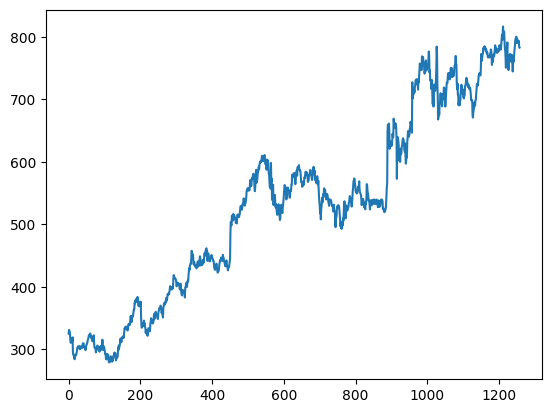

In [11]:
# Visualization of Stock data for Open Values
stock_data_open = df[["Open"]].values.astype('float32')
plt.plot(stock_data_open)
plt.show()

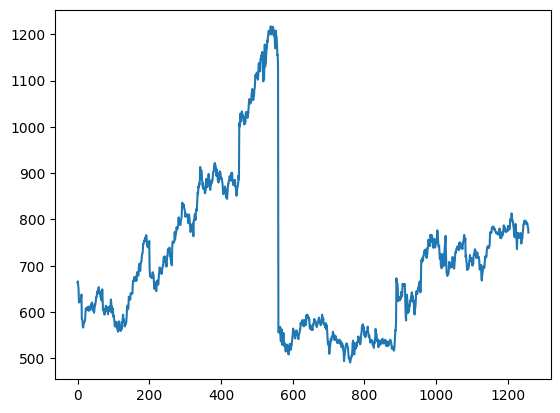

In [12]:
# Visualization of Stock data for Close Values
stock_data_close = df[["Close"]].values.astype('float32')
plt.plot(stock_data_close)
plt.show()

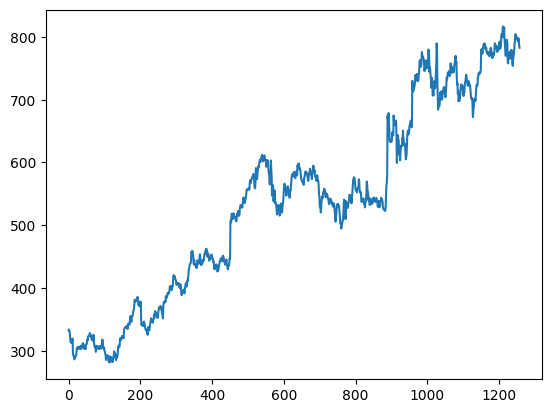

In [13]:
# Visualization of Stock data for High Values
stock_data_high= df[["High"]].values.astype('float32')
plt.plot(stock_data_high)
plt.show()

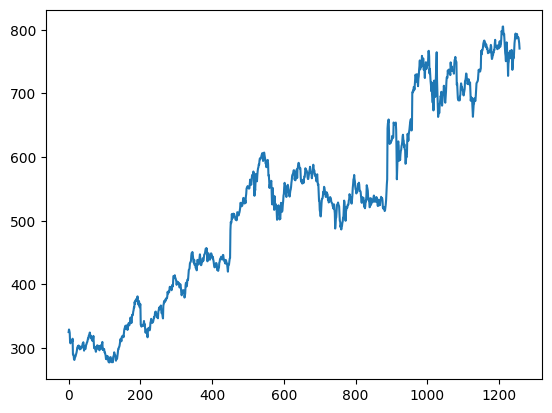

In [14]:
# Visualization of Stock data for Low Values
stock_data_low = df[["Low"]].values.astype('float32')
plt.plot(stock_data_low)
plt.show()

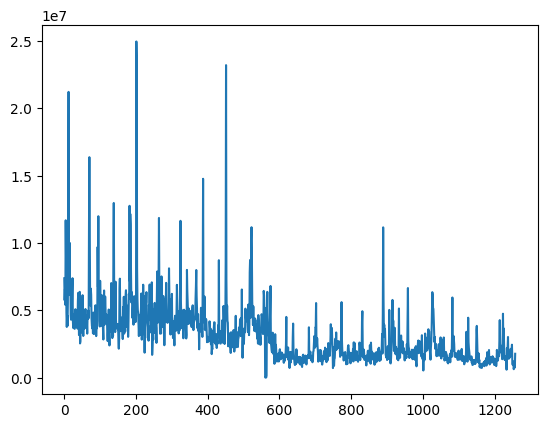

In [15]:
# Visualization of Stock data for Volume Values
stock_data_volume = df[["Volume"]].values.astype('float32')
plt.plot(stock_data_volume)
plt.show()

##Step 3. Split into 80% train 20% prediction

In [16]:
# train-test split for time series for 'Open' Feature of stock data.
train_size_open = int(len(stock_data_open) * 0.8)
test_size_open = len(stock_data_open) - train_size_open
train_open, test_open = stock_data_open[:train_size_open], stock_data_open[train_size_open:]
train_size_open, test_size_open

(1006, 252)

we are using 'Open' Feature of the stock data for the further tasks.

In [17]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 5
X_train, y_train = create_dataset(train_open, lookback=lookback)
X_test, y_test = create_dataset(test_open, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([1001, 5, 1]) torch.Size([1001, 5, 1])
torch.Size([247, 5, 1]) torch.Size([247, 5, 1])


<ipython-input-17-6d43196f8ff7>:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.tensor(X), torch.tensor(y)


In [18]:
# LSTM Model
class stockLSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=70, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.01) #dropout to prevent model from overfiting
        self.linear = nn.Linear(70, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.dropout(x)
        x = self.linear(x)
        return x

##Step 4. Train the model on the data

Training with 600 epochs

In [19]:
# Training the model, using appropriate optimizer and loss function
model = stockLSTM() # Model
optimizer = optim.Adam(model.parameters()) # Optimizer

# Loss function
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 600
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    if epoch % 25 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch+25, train_rmse, test_rmse))

Epoch 25: train RMSE 488.2642, test RMSE 736.4384
Epoch 50: train RMSE 347.0637, test RMSE 588.7989
Epoch 75: train RMSE 229.5246, test RMSE 458.0090
Epoch 100: train RMSE 147.3668, test RMSE 345.6115
Epoch 125: train RMSE 81.4492, test RMSE 244.8614
Epoch 150: train RMSE 54.7130, test RMSE 173.6111
Epoch 175: train RMSE 38.6051, test RMSE 119.1786
Epoch 200: train RMSE 26.8841, test RMSE 86.2476
Epoch 225: train RMSE 20.0204, test RMSE 70.2652
Epoch 250: train RMSE 16.5370, test RMSE 58.2062
Epoch 275: train RMSE 18.9636, test RMSE 53.3533
Epoch 300: train RMSE 13.3214, test RMSE 45.0280
Epoch 325: train RMSE 12.7982, test RMSE 40.0820
Epoch 350: train RMSE 11.8344, test RMSE 39.7110
Epoch 375: train RMSE 13.6728, test RMSE 36.3495
Epoch 400: train RMSE 11.3144, test RMSE 31.2912
Epoch 425: train RMSE 10.0802, test RMSE 29.4545
Epoch 450: train RMSE 10.1748, test RMSE 27.3200
Epoch 475: train RMSE 10.6436, test RMSE 26.5379
Epoch 500: train RMSE 12.3112, test RMSE 27.0020
Epoch 525: t

##Step 5. Report on the results of your model

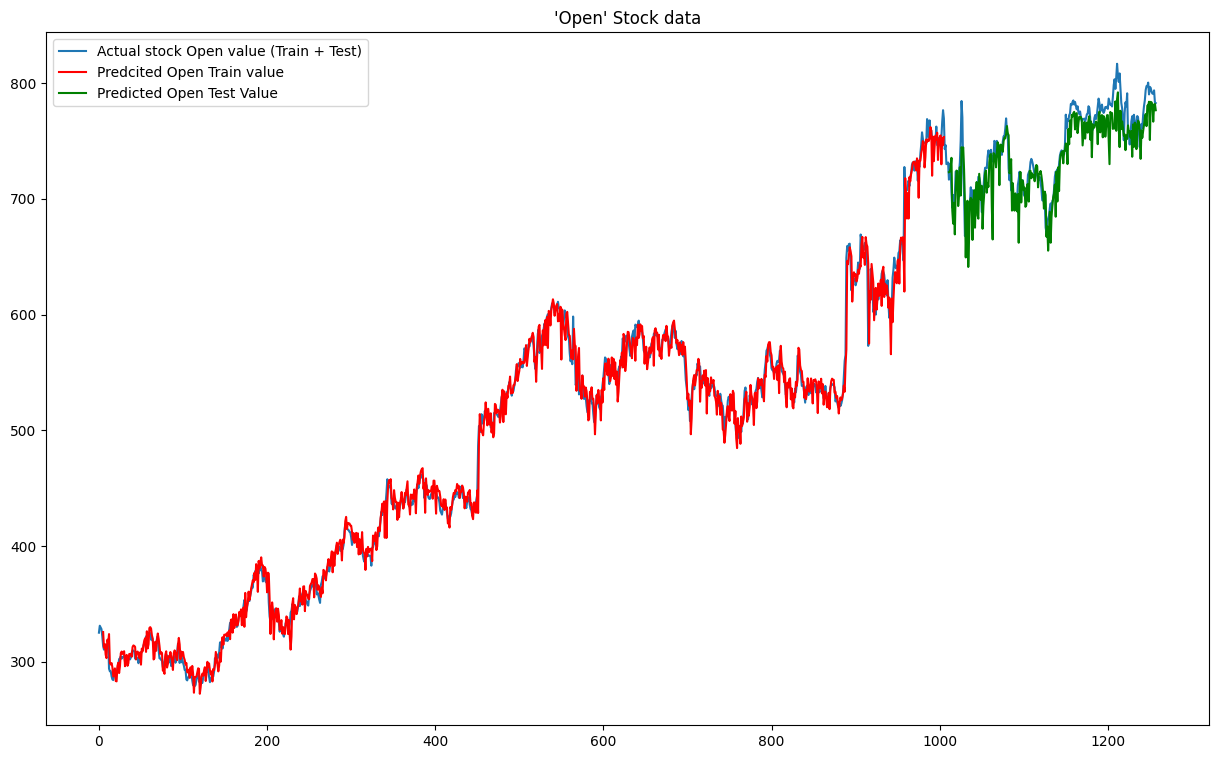

In [20]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(stock_data_open) * np.nan
    train_plot[lookback:train_size_open] = model(X_train)[:, -1, :]

    # shift test predictions for plotting
    test_plot = np.ones_like(stock_data_open) * np.nan
    test_plot[train_size_open+lookback:len(stock_data_open)] = model(X_test)[:, -1, :]

# plot of the Actual Open Value, Train predictions and Test Predictions
plt.figure(figsize=(15,9))
plt.title("Google Stock data 'Open' Value")
plt.plot(stock_data_open,label='Actual stock Open value (Train + Test)')
plt.plot(train_plot, c='r',label='Predcited Open Train value')
plt.plot(test_plot, c='g',label='Predicted Open Test Value')
plt.legend()
plt.show()

In the above plot,

1. Blue color indicates Actual Stock Open Value

2. Red color indicates Train Preditions of Open Value

3. Green color indicates Test Preditions of Open Value

In the above graph Predicted Open Train value is obtained from feeding of Open Train value to the model.

Similarly, Predicted Open Test value is obtained from feeding of Open Test value to the model.

Here we used for Open Train Value to plot the graph which can be easily understandable by Visualizing it.

###Conclusion :

The LSTM model, trained for 600 epochs on stock data, achieved a train RMSE of 8.8048 and a test RMSE of 16.6908, indicating a solid fit to the data and a commendable predictive performance. Using dropout=0.01, model might not have overfitted. The reduced RMSE scores and the close tracking of predicted to actual stock prices on unseen data show the model's improved accuracy and generalization. While these results are promising, the remaining gap between train and test RMSE suggests potential for further optimization.